In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
#from sklearn.impute import KNNImputer

from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None) #forces all columns to be displayed

In [ ]:
cwd = Path.cwd()

filepath = cwd / 'data/model-training-set.csv'
data_train = pd.read_csv(filepath, index_col=None)

In [ ]:
data_train

,strava_id,activity_id,distance,elevation,avg_power,time,tour_year,stage,ride_day,race_start_day,segments,year,profile_score,startlist_quality,time_delta,elevation_ratio,time_trial,no_sessions,mean_train_dist,mean_train_avg_speed,mean_train_elevation,mean_train_EVD
0,1936233,7206463539,158.97,1085.0,299.0,12722,giro-2022,18,2022-05-26,2022-05-06,[],2022,34.0,817,20,0.872208,0,56.0,106.725179,33.570713,1575.714286,1.279520
1,11460770,5606487927,225.41,1986.0,NaN,19278,tdf-2021,13,2021-07-09,2021-06-26,[],2021,29.0,1646,13,0.898070,0,75.0,108.517867,30.842010,1776.920000,1.595306
2,3046537,5298798261,186.72,1649.0,230.0,17481,giro-2021,7,2021-05-14,2021-05-08,[],2021,37.0,885,6,0.898285,0,55.0,111.636909,33.764695,1616.290909,1.284696
3,1678917,5569074608,153.26,3514.0,NaN,16526,tdf-2021,8,2021-07-03,2021-06-26,[],2021,310.0,1646,7,0.958209,0,75.0,97.408800,32.415516,1467.346667,1.339883
4,1216273,4010546467,173.43,1974.0,NaN,13609,tdf-2020,7,2020-09-04,2020-08-29,[],2020,47.0,1662,6,0.919238,0,76.0,101.993026,25.524804,2404.618421,2.448843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,1678917,7157863848,205.35,1849.0,NaN,17733,giro-2022,10,2022-05-17,2022-05-06,[],2022,86.0,817,11,0.900041,0,23.0,123.840000,34.131966,1466.260870,1.068895
7680,2885876,7174112124,155.74,1705.0,NaN,12849,giro-2022,13,2022-05-20,2022-05-06,[],2022,51.0,817,14,0.916302,0,23.0,99.950435,29.038191,2103.173913,1.961782
7681,8843498,7174271986,154.46,1749.0,317.0,13221,giro-2022,13,2022-05-20,2022-05-06,[],2022,51.0,817,14,0.918853,0,41.0,96.446098,32.279606,1017.414634,1.002129
7682,1630132,3992236659,197.35,2584.0,NaN,18918,tdf-2020,3,2020-08-31,2020-08-29,[],2020,81.0,1662,2,0.929045,0,65.0,120.618923,30.765480,2483.846154,2.095948


In [ ]:
list(data_train.columns)


['strava_id',
 'activity_id',
 'distance',
 'elevation',
 'avg_power',
 'time',
 'tour_year',
 'stage',
 'ride_day',
 'race_start_day',
 'segments',
 'year',
 'profile_score',
 'startlist_quality',
 'time_delta',
 'elevation_ratio',
 'time_trial',
 'no_sessions',
 'mean_train_dist',
 'mean_train_avg_speed',
 'mean_train_elevation',
 'mean_train_EVD']

In [6]:
features = [
            'distance',
            'elevation',
            #'stage',
            #'year',
            'profile_score',
            'startlist_quality',
            'time_delta',
            #'elevation_ratio',
            'time_trial',
            #'no_sessions',
            'mean_train_dist',
            'mean_train_avg_speed',
            'mean_train_elevation',
            'mean_train_EVD'
            ]
target = 'time'

In [ ]:
X = data_train[features]
y = data_train[target]

In [ ]:
X_tt, X_val, y_tt, y_val = train_test_split(X, y, 
                                            train_size=0.8, 
                                            random_state=42, 
                                            shuffle=True)

In [9]:
linear = Pipeline([('scale', StandardScaler()), #For comparing coefficient sizes
                    ('linreg', LinearRegression())])

linear.fit(X_tt, y_tt)
linear_train_preds = linear.predict(X_tt)
linear_val_preds = linear.predict(X_val)

print('Linear RMSE on the training set:', root_mean_squared_error(y_tt, linear_train_preds))
print('Linear RMSE on the validation set:', root_mean_squared_error(y_val, linear_val_preds))

Linear RMSE on the training set: 944.3614258122346
Linear RMSE on the validation set: 944.0540024368881


In [10]:
ada = AdaBoostRegressor()
ada.fit(X_tt, y_tt)

ada_train_preds = ada.predict(X_tt)
ada_val_preds = ada.predict(X_val)

print('AdaBoost RMSE on the training set:', root_mean_squared_error(y_tt, ada_train_preds))
print('AdaBoost RMSE on the validation set:', root_mean_squared_error(y_val, ada_val_preds))

AdaBoost RMSE on the training set: 981.0308144945135
AdaBoost RMSE on the validation set: 983.0115400683259


In [11]:
xgb = XGBRegressor()
xgb.fit(X_tt, y_tt)

xgb_train_preds = xgb.predict(X_tt)
xgb_val_preds = xgb.predict(X_val)

print('XGB RMSE on the training set:', root_mean_squared_error(y_tt, xgb_train_preds))
print('XGB RMSE on the validation set:', root_mean_squared_error(y_val, xgb_val_preds))

XGB RMSE on the training set: 212.1173553466797
XGB RMSE on the validation set: 479.6808166503906


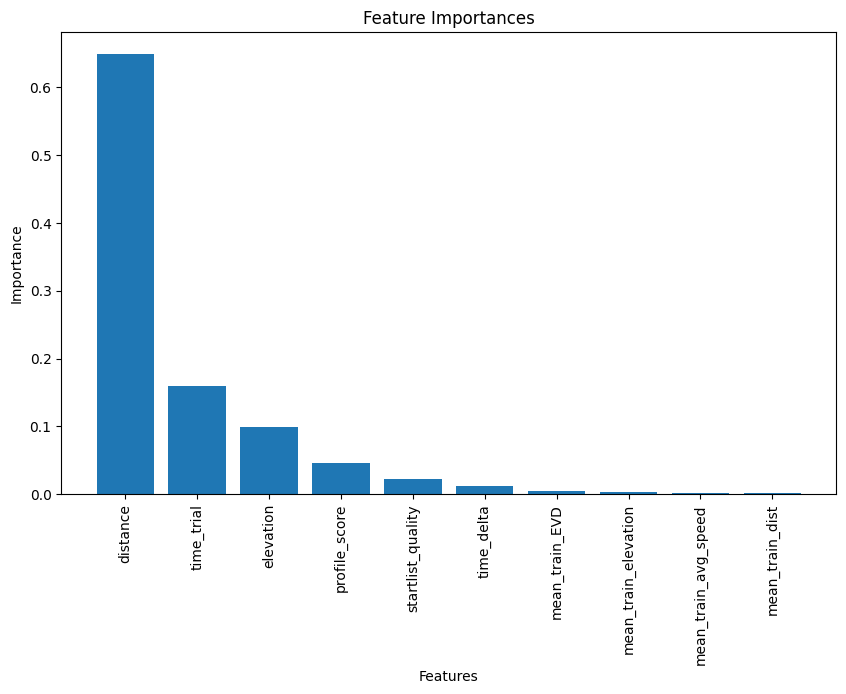

In [ ]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(x=range(X.shape[1]), height=importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [23]:
forest_reg = RandomForestRegressor(#max_depth=10, 
                                   #max_leaf_nodes=20,
                                   #max_samples=0.25,
                                   #n_estimators=250,
                                   #min_samples_leaf=5,
                                   #min_samples_split=5,
                                   )

forest_reg.fit(X_tt, y_tt)
forest_train_preds = forest_reg.predict(X_tt)
forest_val_preds = forest_reg.predict(X_val)

print('Forest RMSE on the training set:', root_mean_squared_error(y_tt, forest_train_preds))
print('Forest RMSE on the validation set:', root_mean_squared_error(y_val, forest_val_preds))

Forest RMSE on the training set: 187.66075526795782
Forest RMSE on the validation set: 511.7728908763917


In [ ]:
svm_pipe = Pipeline([('scaler', StandardScaler()),
                        ('svr', SVR(kernel='linear'))])

svm_pipe.fit(X_tt, y_tt)
svm_train_preds = svm_pipe.predict(X_tt)
svm_val_preds = svm_pipe.predict(X_val)

print('SVM RMSE on the training set:', root_mean_squared_error(y_tt, svm_train_preds))
print('SVM RMSE on the validation set:', root_mean_squared_error(y_val, svm_val_preds))


SVM RMSE on the training set: 1173.9184278991488
SVM RMSE on the validation set: 1135.6460972093382


### Cross validation for stronger model analysis

In [14]:
cross_validate(xgb, X, y=y, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], return_train_score=True)

{'fit_time': array([0.22175503, 0.13700366, 0.11202312, 0.11464691, 0.13222408]),
 'score_time': array([0.00574303, 0.00442219, 0.00423479, 0.003865  , 0.00385475]),
 'test_neg_root_mean_squared_error': array([-459.04193115, -469.02801514, -438.91317749, -470.04412842,
        -480.81411743]),
 'train_neg_root_mean_squared_error': array([-209.41209412, -211.05300903, -209.96852112, -211.36380005,
        -204.45288086]),
 'test_neg_mean_absolute_percentage_error': array([-0.02782789, -0.02621884, -0.02536226, -0.02514264, -0.02690895]),
 'train_neg_mean_absolute_percentage_error': array([-0.01264688, -0.01265057, -0.01294155, -0.01318707, -0.01233924])}

In [15]:
cross_validate(linear, X, y=y, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], return_train_score=True)

{'fit_time': array([0.0086    , 0.01023507, 0.01241708, 0.00660801, 0.00581813]),
 'score_time': array([0.00399375, 0.00609684, 0.00571704, 0.00426197, 0.00269198]),
 'test_neg_root_mean_squared_error': array([-960.8920137 , -951.38947376, -926.28939148, -956.47565735,
        -971.44149688]),
 'train_neg_root_mean_squared_error': array([-949.35376118, -942.53832813, -948.78897158, -941.12392381,
        -937.46186954]),
 'test_neg_mean_absolute_percentage_error': array([-0.06148165, -0.06281783, -0.05762213, -0.05589661, -0.05939141]),
 'train_neg_mean_absolute_percentage_error': array([-0.05941528, -0.05881718, -0.05916094, -0.05960572, -0.05834394])}

In [16]:
cross_validate(forest_reg, X, y=y, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], return_train_score=True)

{'fit_time': array([4.11112714, 4.00422406, 3.84064507, 3.89061666, 4.19322085]),
 'score_time': array([0.04705882, 0.04571486, 0.04752684, 0.04452729, 0.05018902]),
 'test_neg_root_mean_squared_error': array([-487.61109226, -510.08194231, -485.22845906, -508.42355848,
        -519.8605674 ]),
 'train_neg_root_mean_squared_error': array([-186.33293945, -187.70174407, -186.47900167, -182.98351818,
        -185.98034542]),
 'test_neg_mean_absolute_percentage_error': array([-0.02514691, -0.02503923, -0.02385562, -0.02442029, -0.0247793 ]),
 'train_neg_mean_absolute_percentage_error': array([-0.00905125, -0.00915672, -0.00923112, -0.00917899, -0.00916146])}

In [17]:
cross_validate(svm_pipe, X, y=y, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], return_train_score=True)

{'fit_time': array([1.05545235, 1.00749278, 0.99813914, 1.20092201, 1.11647511]),
 'score_time': array([0.15358686, 0.14980507, 0.15052128, 0.14797187, 0.15050602]),
 'test_neg_root_mean_squared_error': array([-1355.59708165, -1161.30985505, -1166.85161944, -1170.68937625,
        -1176.35955049]),
 'train_neg_root_mean_squared_error': array([-1173.5578595 , -1174.38154089, -1174.10458104, -1174.86068676,
        -1173.67614842]),
 'test_neg_mean_absolute_percentage_error': array([-0.10430869, -0.10096077, -0.08225297, -0.07674076, -0.08436372]),
 'train_neg_mean_absolute_percentage_error': array([-0.09011885, -0.08696849, -0.0894116 , -0.09012073, -0.08821545])}